## **K - Nearest Neighbors**

K Nearest Neighbour is a simple algorithm that stores all the available cases and classifies the new data or case based on a similarity measure. It is mostly used to classifies a data point based on how its neighbours are classified. 

<img src = "https://miro.medium.com/max/718/1*X1KBJctko0RH6BWBsu-XjA.png">

<img src = "https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png" >

# K-Nearest Neighbors (KNN)

K-Nearest Neighbors, or KNN, is one of the simplest machine learning algorithms. It works by finding the closest data points (neighbors) to make predictions. Here's how it works:

## How KNN Works:

1. **Understanding the Data:**  
   Imagine you have some data points that are already labeled (e.g., apples and oranges). These are your training data.

2. **The New Data Point:**  
   Now, you get a new data point, and you want to guess its label (e.g., is it an apple or an orange?).

3. **Finding Neighbors:**  
   KNN checks the "distance" between the new data point and all the existing points. It chooses the **K nearest points**. The number **K** is a number you choose, like 3 or 5.

4. **Voting:**  
   Among these K neighbors, the algorithm looks at their labels. The new point is labeled based on the majority of its neighbors. For example:
   - If most neighbors are apples, the new point is labeled as an apple.
   - If most neighbors are oranges, the new point is labeled as an orange.

## Key Points to Understand:
- **Distance:**  
  KNN uses a mathematical formula (like Euclidean distance) to measure how close points are to each other. Think of this as "closer points look more similar."

- **Choosing K:**  
  - If K is too small (like 1), it might be too sensitive to outliers.  
  - If K is too large, it might mix up different groups.

- **No Training Required:**  
  KNN doesn’t “learn” during training; it simply stores the data. All the work happens when making predictions.

## Real-Life Example:  
Imagine you’re moving to a new city and want to know which restaurant to try. You might ask your 3 closest friends for recommendations:
- If 2 of them suggest a pizza place and 1 suggests a burger joint, you’ll probably go with the pizza place.  

This is like KNN—majority wins!


## **Geting Started with KNN Classifier**

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

## **DataFraming**

Read .csv data into a Dataframe

In [3]:
data = pd.read_csv("./credit_data.csv")
data.head(20)

,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1
5,6,24904.064140,57.471607,15.498598,0.000622,0
6,7,48430.359613,26.809132,5722.581981,0.118161,0
7,8,24500.141984,32.897548,2971.003310,0.121265,1
8,9,40654.892537,55.496853,4755.825280,0.116980,0
9,10,25075.872771,39.776378,1409.230371,0.056199,0


In [4]:
# A very simple & Logical technique to find total number of defaulters
data.default.sum()

283

In [5]:

#Finding  number of Nan or missing values in all columns
print(data.isna().sum(axis = 0))

# data.isna().sum(axis = 0)   # Nan values in every column
# data.isna().sum(axis = 1)   # Nan values in every row.

clientid    0
income      0
age         0
loan        0
LTI         0
default     0
dtype: int64


## **Features Extraction**

Extracting features and splitting data into test and train.

In [6]:
features = data[["income","age","loan"]]
target = data.default

In [7]:
features.head()

,income,age,loan
0,66155.925095,59.017015,8106.532131
1,34415.153966,48.117153,6564.745018
2,57317.170063,63.108049,8020.953296
3,42709.534201,45.751972,6103.642260
4,66952.688845,18.584336,8770.099235


In [8]:
target.head()


0    0
1    0
2    0
3    0
4    1
Name: default, dtype: int64

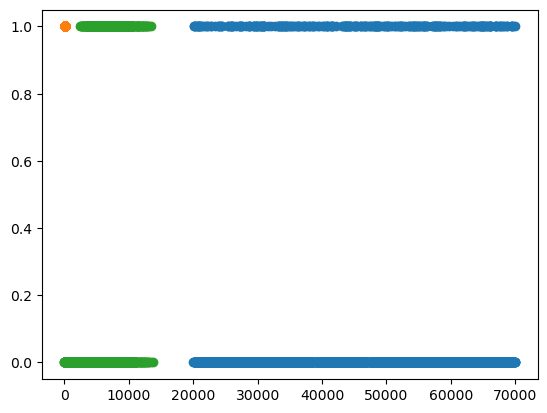

In [9]:
plt.scatter(data.income, data.default)
plt.scatter(data.age, data.default)
plt.scatter(data.loan, data.default)
plt.show()

In [11]:
features.shape
# target.shape

(2000, 3)

## **Preprocessing : Standard Scaling**

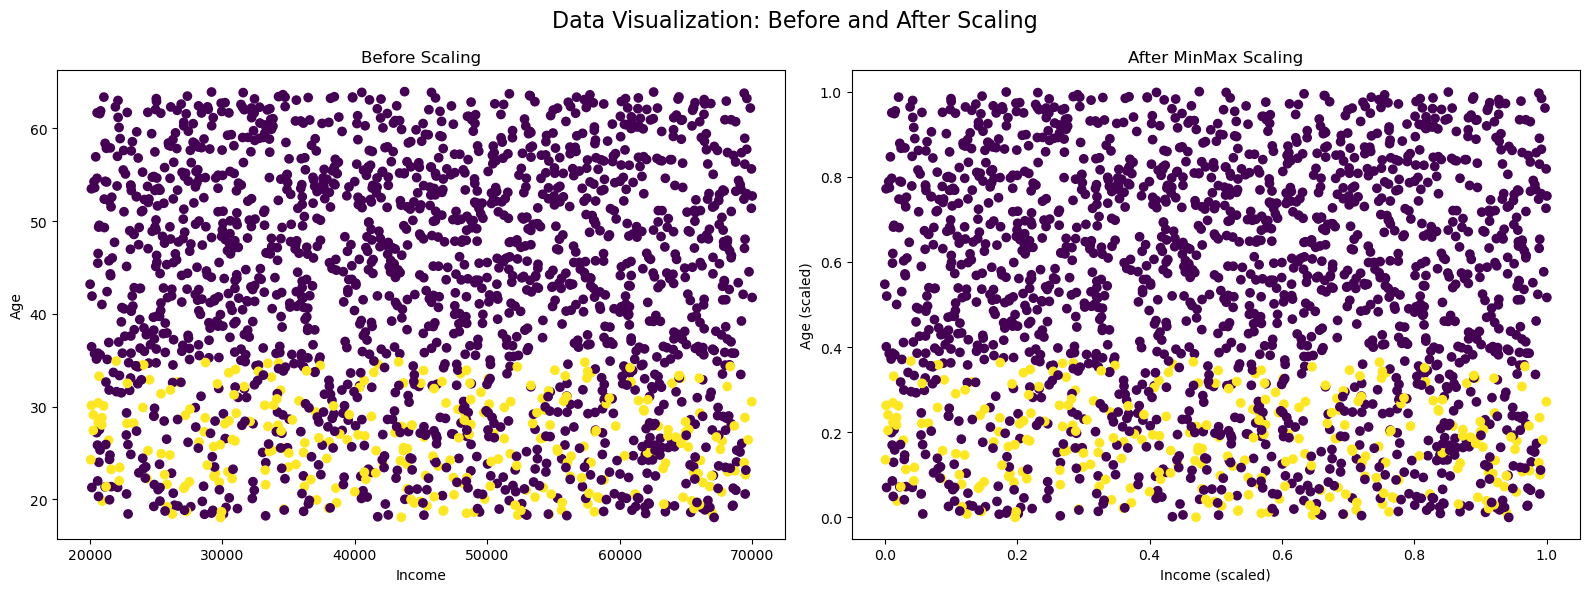

In [13]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Data Visualization: Before and After Scaling', fontsize=16)

# Plot before scaling
ax1.scatter(features['income'], features['age'], c=target, cmap='viridis')
ax1.set_title('Before Scaling')
ax1.set_xlabel('Income')
ax1.set_ylabel('Age')

# Apply MinMax scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Plot after scaling
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=target, cmap='viridis')
ax2.set_title('After MinMax Scaling')
ax2.set_xlabel('Income (scaled)')
ax2.set_ylabel('Age (scaled)')

plt.tight_layout()
plt.show()

# Update your features to use the scaled version
features = scaled_features

# Now proceed with your train-test split and model training
feature_train, feature_test, target_train, target_test = train_test_split(features, target)

## **Training the Model**

We are using KNeighborsClassifier model as imported from sklearn.neighbors library and then it's being trained on feature_train and target_train

In [16]:
model = KNeighborsClassifier(n_neighbors=33)
fitModel = model.fit(feature_train, target_train)
predictions = fitModel.predict(feature_test)

## **Finding Optimal K Value**

We are going to use cross-validation in order to find the optimal k value. This optimal value is not going to have as good accuracy and precision as we have seen for any neighbors close to n but it is going to be much more realistic because we use cross-validation. So we are going to use the cross-validation scores and then we are going to make a simple iteration. Basically we are going to consider k values from 1 up to 100.

## **Finding Optimal K Value**

In KNN, choosing the right value for **k** is crucial.  
- A value of **k** that is too small can make the model sensitive to **noise**.  
- A value of **k** that is too large can make the model ignore **local patterns**.  

### How Cross-Validation Helps Find the Optimal K:
1. **Reducing Overfitting**:  
   Cross-validation tests the model on different subsets of the data, ensuring the chosen **k** works well across various data splits.

2. **Providing Robust Estimates**:  
   By using multiple train-test splits, we get a more reliable estimate of the model's performance for each **k**.

3. **Balancing Bias-Variance Trade-off**:  
   Cross-validation helps find a **k** that neither underfits nor overfits the data.


In [15]:
cross_valid_scores = []

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, features, target, cv=10, scoring='accuracy')
    cross_valid_scores.append(scores.mean())    
# print(f"cross validation score for k = {cross_valid_scores}")

best_k = np.argmax(cross_valid_scores) + 1  # Add 1 to get the correct k value
print(f"Optimal k with cross-validation: {best_k}")

Optimal k with cross-validation: 33


# Understanding 10-Fold Cross-Validation

In our code, we use `'cv=10'`, which means we're performing 10-fold cross-validation. Here's what that means:

---

## 1. Data Splitting
The entire dataset is divided into **10 equal parts** (or "folds").

---

## 2. Iterative Process
The model goes through **10 iterations**:
- In each iteration:
  - **9 folds are used for training**.
  - **1 fold is used for testing**.
- This process is repeated until each fold has been used as the test set once.

---

## 3. Performance Measurement
- The model's performance is measured on each of the **10 test sets**.
- These **10 performance scores** are then averaged to give a final score.

---

## 4. Why 10 Folds?
- **10** is a common choice as it often provides a good balance between:
  - **Computational cost**
  - **Reliable performance estimation**
- It works well for most datasets, but you can adjust this number based on your specific needs.

---

## 5. Advantages
- **Reduces overfitting:**
  - Each data point gets to be in the test set once and in the training set 9 times.
- **Robust estimate:**
  - Provides a more robust estimate of the model's performance across different subsets of the data.
- **Better generalization:**
  - Helps in assessing how well the model generalizes to unseen data.



## **Printing an Error Matrix and Accuracy Score**

In [53]:

# Print confusion matrix and accuracy score
print("Confusion Matrix:")
print(confusion_matrix(target_test, predictions))

# For comparison, print the cross-validation score
print(f"\nCross-validation accuracy: {cross_valid_scores[best_k-1]:.4f}")

Confusion Matrix:
[[430   3]
 [  8  59]]

Cross-validation accuracy: 0.9845


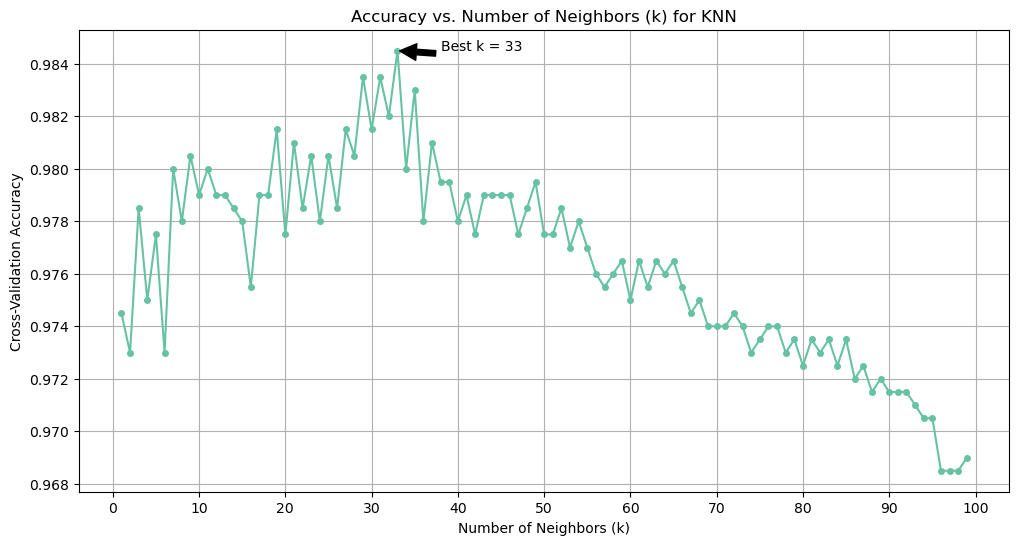

The optimal number of neighbors is 33
The highest accuracy is 0.9845


In [40]:
# Plotting accuracy vs. k
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), cross_valid_scores, marker='o', markersize=4)
plt.title('Accuracy vs. Number of Neighbors (k) for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(range(0, 101, 10))
plt.grid(True)

# Highlight the best k
best_k = np.argmax(cross_valid_scores) + 1  # +1 because range starts at 1
plt.annotate(f'Best k = {best_k}',
             xy=(best_k, cross_valid_scores[best_k-1]),
             xytext=(best_k+5, cross_valid_scores[best_k-1]),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.show()

print(f"The optimal number of neighbors is {best_k}")
print(f"The highest accuracy is {cross_valid_scores[best_k-1]:.4f}")